# 正则化

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 线性回归
### 数据加载

In [2]:
fx = open("./ex5Linx.dat",'r+')
fy = open("./ex5Liny.dat",'r+')
linesx = fx.readlines()
linesy = fy.readlines()
x = np.array([float(i.strip('\n')) for i in linesx])
y = np.array([float(i.strip('\n')) for i in linesy])
fx.close()
fy.close()

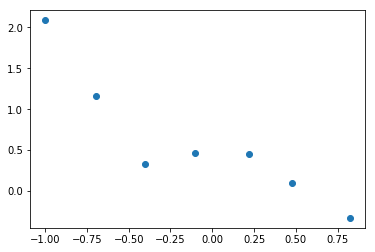

In [3]:
plt.plot(x,y,'o')

In [4]:
x_mat = np.array([np.ones(len(x)),x,x**2,x**3,x**4,x**5])

In [5]:
def get_theta(lamda): 
    I = np.eye(6,dtype=int)
    I[0,0] = 0
    theta = np.mat(np.array(x_mat).dot(np.array(x_mat).T)+lamda*I).I.dot(x_mat).dot(y)
    return np.array(theta)

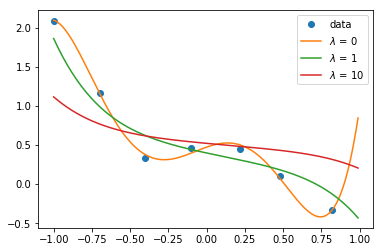

In [6]:
x_line = np.arange(-1,1,0.01)
theta = get_theta(0)
y_line = theta[0][0] +theta[0][1]*x_line+ theta[0][2]*(x_line**2)+ theta[0][3]*(x_line**3)+ theta[0][4]*(x_line**4)+ theta[0][5]*(x_line**5)
plt.plot(x,y,'o',label = 'data')
plt.plot(x_line,y_line,'-',label = '$\lambda$ = 0')
x_line = np.arange(-1,1,0.01)
theta = get_theta(1)
y_line = theta[0][0] +theta[0][1]*x_line+ theta[0][2]*(x_line**2)+ theta[0][3]*(x_line**3)+ theta[0][4]*(x_line**4)+ theta[0][5]*(x_line**5)
plt.plot(x_line,y_line,'-',label = '$\lambda$ = 1')
x_line = np.arange(-1,1,0.01)
theta = get_theta(10)
y_line = theta[0][0] +theta[0][1]*x_line+ theta[0][2]*(x_line**2)+ theta[0][3]*(x_line**3)+ theta[0][4]*(x_line**4)+ theta[0][5]*(x_line**5)
plt.plot(x_line,y_line,'-',label = '$\lambda$ = 10')
plt.legend()

## 逻辑回归
### 数据加载

In [7]:
fx = open("./ex5Logx.dat",'r+')
fy = open("./ex5Logy.dat",'r+')
linesx = fx.readlines()
linesy = fy.readlines()
x = [i.strip('\n') for i in linesx]
y = np.array([int(i.strip('\n')) for i in linesy])
x = [i.split(',') for i in x]
x = np.array([[float(j) for j in i] for i in x])

In [94]:
def map_feature(f1,f2):
    result = []
    i = 0
    while i <= 6 :
        j = 0
        while j <= i:
            result.append((f1**(i-j))*(f2**(j)))
            j += 1
        i += 1
    return np.array(result)            

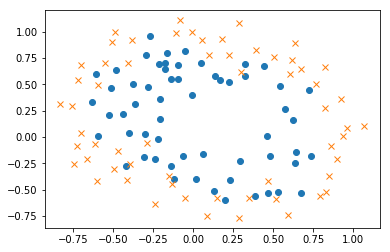

In [71]:
plt.plot( x[np.where(y == 1)][:,0],x[np.where(y == 1)][:,1],'o')
plt.plot( x[np.where(y == 0)][:,0],x[np.where(y == 0)][:,1],'x')

#### 这里feature提取直接使用matlab代码进行处理并且储存起来了

In [72]:
fex = open("./feature.dat",'r+')
feature = fex.readlines()
feature = [f.strip('\n').split() for f in feature]
feature = np.array([[float(i) for i in f] for f in feature])
fex.close()

In [73]:
def h(theta,x_feature):
#     print('dot',theta.dot(x_feature))
    return 1/(1+np.exp(-theta.dot(x_feature)))

def J(theta,feature,y,lamda):
    m = len(y)
    J = -(sum([y[i]*np.log2(h(theta,feature[i]))+ (1-y[i]) * np.log2(1-h(theta,feature[i])) for i in range(m)]))/m + lamda/2/m * sum([theta[i]**2 for i in range(len(theta))])
    return J

In [74]:
def dJ(theta,lamda,feature,y):
    m = len(y)
    dJ = []
    dJ = np.array([(sum([(h(theta,feature[i]) - y[i])*feature[i][j] for i in range(m)]))/m for j in range(28)])
#     print(sum([(h(theta,feature[i]) - y[i])*feature[i][j] for i in range(m)]))
    for j in range(27):
        dJ[j+1] += lamda/m * theta[j+1]
    return dJ

In [75]:
def HessianMatrix(theta,lamda,feature,y):
    m = len(y)
    H = np.zeros((28,28))
    for i in range(m):
        H += h(theta,feature[i])*(1 - h(theta,feature[i]))*(np.array([feature[i]]).T.dot(np.array([feature[i]])))
    H /= m
    I = np.eye(28,dtype=float)
    I[0,0] = 0
    H += lamda/m*I
    return H

## 最优化求解theta


In [150]:
loss1 = []
theta1 = np.zeros(28)##28是特征维度
lamda = 0.0
for i in range(50):
    loss1.append(J(theta1,feature,y,lamda))
    H = HessianMatrix(theta1,lamda,feature,y)
    H = np.array(np.mat(H).I.tolist())
    theta1 = theta1 - H.dot(dJ(theta1,lamda,feature,y))
loss2 = []
theta2 = np.zeros(28)##28是特征维度
lamda = 1.0
for i in range(50):
    loss2.append(J(theta2,feature,y,lamda))
    H = HessianMatrix(theta2,lamda,feature,y)
    H = np.array(np.mat(H).I.tolist())
    theta2 = theta2 - H.dot(dJ(theta2,lamda,feature,y))
loss3 = []
theta3 = np.zeros(28)##28是特征维度
lamda = 10.0
for i in range(50):
    loss3.append(J(theta3,feature,y,lamda))
    H = HessianMatrix(theta3,lamda,feature,y)
    H = np.array(np.mat(H).I.tolist())
    theta3 = theta3 - H.dot(dJ(theta3,lamda,feature,y))

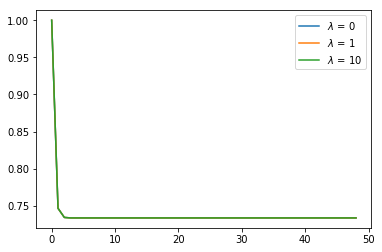

In [151]:
plt.plot(np.arange(0,len(loss1[:-1]),1),loss2[:-1],'-',label = '$\lambda$ = 0')
plt.plot(np.arange(0,len(loss2[:-1]),1),loss2[:-1],'-',label = '$\lambda$ = 1')
plt.plot(np.arange(0,len(loss2[:-1]),1),loss2[:-1],'-',label = '$\lambda$ = 10')
plt.legend()

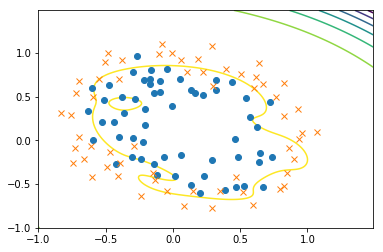

In [152]:
plt.plot( x[np.where(y == 1)][:,0],x[np.where(y == 1)][:,1],'o')
plt.plot( x[np.where(y == 0)][:,0],x[np.where(y == 0)][:,1],'x')
u = np.arange(-1, 1.5 , 0.01) 
v = np.arange(-1, 1.5 , 0.01) 
z = np.zeros((len(u) , len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i][j] = map_feature(u[i],v[j]).dot(theta1)
plt.contour(u,v,z, linewidth = 0.5,label = '$\lambda$ = 0')


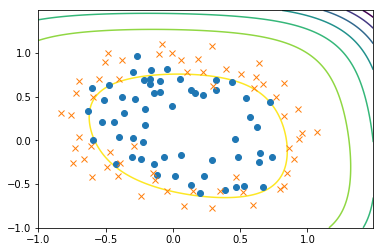

In [153]:
plt.plot( x[np.where(y == 1)][:,0],x[np.where(y == 1)][:,1],'o')
plt.plot( x[np.where(y == 0)][:,0],x[np.where(y == 0)][:,1],'x')
z = np.zeros((len(u) , len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i][j] = map_feature(u[i],v[j]).dot(theta2)
plt.contour(u,v,z, linewidth = 0.5,label = '$\lambda$ = 1')


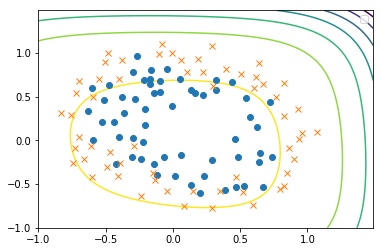

In [154]:
plt.plot( x[np.where(y == 1)][:,0],x[np.where(y == 1)][:,1],'o')
plt.plot( x[np.where(y == 0)][:,0],x[np.where(y == 0)][:,1],'x')
z = np.zeros((len(u) , len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i][j] = map_feature(u[i],v[j]).dot(theta3)
plt.contour(u,v,z, linewidth = 0.5,label = '$\lambda$ = 10')
plt.legend()